In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import io
import os

%matplotlib inline

In [2]:
%cd ..
from object_detection.data_decoders import tf_example_decoder as tf_deco

/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/light_classifier


In [ ]:
TFRECORDS_PATH = '../data/bosch/tfrecords/'
tfrecords_filename = 'test.record'
tfrecords_full_path = os.path.abspath(os.path.join(TFRECORDS_PATH, tfrecords_filename))

In [3]:
TFRECORDS_PATH = '../data/sim/sim_training_data_large/tfrecord/'
tfrecords_filename = 'sim.record'
tfrecords_full_path = os.path.abspath(os.path.join(TFRECORDS_PATH, tfrecords_filename))

In [4]:
record_iterator = tf.python_io.tf_record_iterator(tfrecords_full_path)

image_filenames = []
image_classes = []
image_labels = []
label_difficulty = []
images = []
bboxes = []

for string_record in record_iterator:

    example = tf.train.Example()
    example.ParseFromString(string_record)
    
    # FILENAME
    img_fn = str(example.features.feature['image/filename']
                                 .bytes_list
                                 .value[0])
    
    image_filenames.append(img_fn)
    
    # CLASS
    img_class = str(example.features.feature['image/object/class/text']
                                 .bytes_list.value[:])
    
    image_classes.append(img_class)
    
    # LABEL
    img_label = (example.features.feature['image/object/class/label']
                                 .int64_list.value[:])
    
    image_labels.append(img_label)
    
    # IMAGE
    img_encoded = example.features.feature['image/encoded'].bytes_list.value[:]
    
    images.append(img_encoded)
    
    # DIFFICULTY
    difficulty = (example.features.feature['image/object/difficult']
                                 .int64_list.value[:])
    
    label_difficulty.append(difficulty)

    # BOUNDING BOX
    xmin = (example.features.feature['image/object/bbox/xmin']
                            .float_list.value[:])
    
    xmax = (example.features.feature['image/object/bbox/xmax']
                            .float_list.value[:])
    
    ymin = (example.features.feature['image/object/bbox/ymin']
                            .float_list.value[:])

    ymax = (example.features.feature['image/object/bbox/ymax']
                            .float_list.value[:])
    
    bbox = np.array((ymin, xmin, ymax, xmax))
    
    bboxes.append(bbox)

image filename:  b'/home/bruno/Documents/eLearning/udacity/CarND/t3/CarND-Capstone/data/sim/sim_training_data_large/sim_data_capture/left0020.jpg'
image labels:  [7, 7, 7]
image classes:  [b'Yellow', b'Yellow', b'Yellow']
difficulty:  []
Bounding Boxes - one box per row - cols are ymin, xmin, ymax, xmax 
 [[ 0.43200001  0.1376      0.64693332  0.20280001]
 [ 0.43786666  0.47440001  0.65333331  0.5388    ]
 [ 0.44373333  0.80680001  0.6656      0.87959999]]


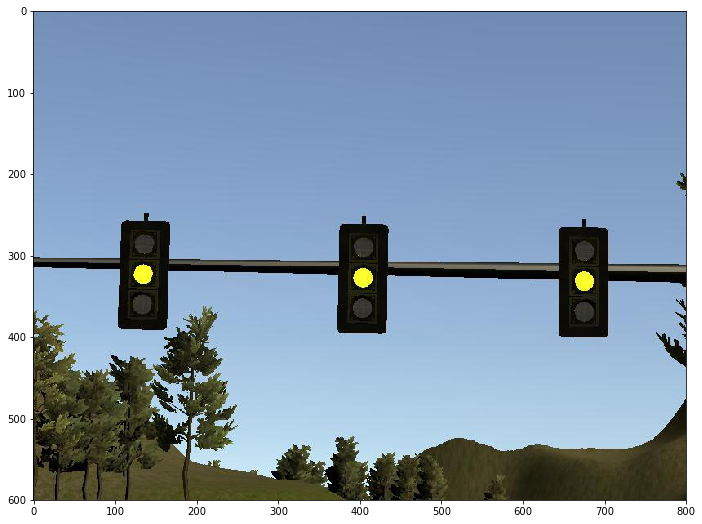

In [5]:
img_index = 10

print ("image filename: ", image_filenames[img_index])
print ("image labels: ", image_labels[img_index])
print ("image classes: ", image_classes[img_index])
print ("difficulty: ", label_difficulty[img_index])
print ("Bounding Boxes - one box per row - cols are ymin, xmin, ymax, xmax \n", np.transpose(bboxes[img_index]))

image = Image.open(io.BytesIO((images[img_index][0])))
plot = plt.figure(figsize=(1280/80, 720/80.))
plt.imshow(image)

In [6]:
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util

In [7]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
PATH_TO_LABELS = '../data/bosch/bosch_label_map.pbtxt'
NUM_CLASSES = 14

In [8]:
PATH_TO_LABELS = '../data/sim/label_map.pbtxt'
NUM_CLASSES = 14

In [9]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [22]:
str.lower(category_index[1]['name'])

'green'

In [39]:
category_index[1]['name']

'Green'

In [10]:
image_np = load_image_into_numpy_array(image)

In [ ]:
len(image_labels[img_index])

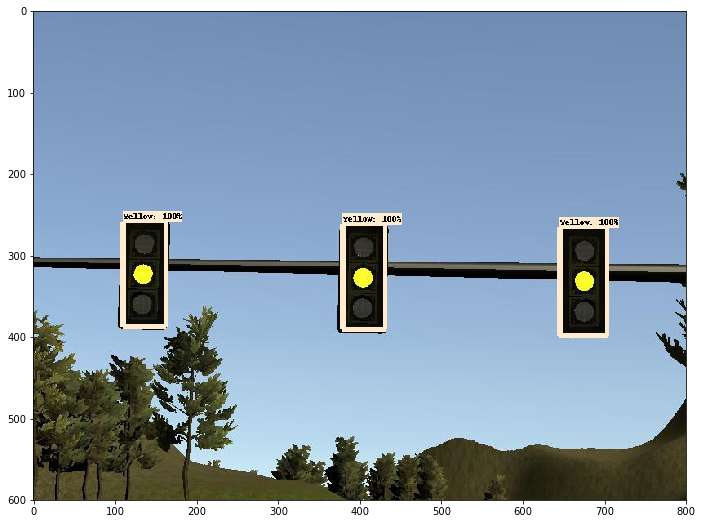

In [11]:
# Visualization of the results of a detection.
vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      np.squeeze(np.transpose(bboxes[img_index])),
      np.squeeze(image_labels[img_index]).astype(np.int32),
      np.squeeze([1] * len(image_labels[img_index])),
      category_index,
      use_normalized_coordinates=True,
      line_thickness=5)

plt.figure(figsize=(1*1280/80, 1*720/80.))
plt.imshow(image_np)